### Final Report
Name: Siyuan Li | SID:914038304

### Import packages:

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

### Import Data

In [4]:
# "Superconductivity"
df_feat=pd.read_csv("train.csv")
df_chem=pd.read_csv("unique_m.csv")

In [5]:
df_feat.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


### I. Descrptive Data Analysis:

#### 1. Feature Properties:

In [6]:
### Check Features Information
dt_ft_top = list(df_feat.columns.values)

### Check Chemical Elements Information
dt_che_top = list(df_chem.columns.values)

## Check length of both two datasets
len(dt_che_top)
len(dt_ft_top)

82

#### 2. Label Distribution:

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

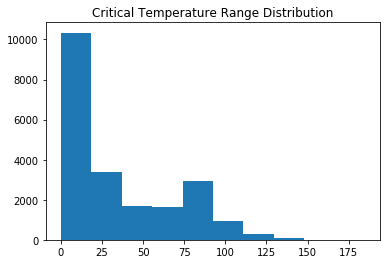

In [7]:
# Check missing values
df_feat.isnull().sum().sum()
df_chem.isnull().sum().sum()

# distribution of temperature label
temp_label=df_feat.critical_temp
plt.hist(temp_label)
plt.title("Critical Temperature Range Distribution")

# Check critical temperature distribution
df_feat['critical_temp'].describe()

count    21263.000000
mean         4.115224
std          1.439295
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: number_of_elements, dtype: float64

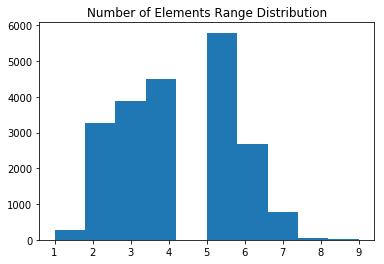

In [8]:
# distribution of number of elements 
nme_label=df_feat.number_of_elements
plt.hist(nme_label)
plt.title("Number of Elements Range Distribution")

df_feat['number_of_elements'].describe()

#### 3.Elements Exploration:

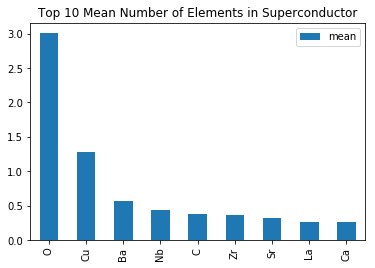

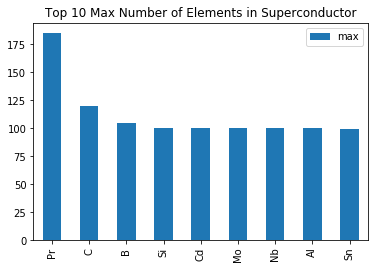

In [9]:
# Get summary of chemical data
chem_sum=df_chem.describe()

# check the mean elements number
chem_mean=chem_sum.iloc[1,0:86]
chem_mean_dt=pd.DataFrame(chem_mean)
chem_mean_dt=chem_mean_dt.sort_values(by=['mean'],ascending=False)
chem_mean_dt=chem_mean_dt.iloc[0:9,]
chem_mean_dt.plot(kind='bar',title ="Top 10 Mean Number of Elements in Superconductor")

# check the max elements number
chem_max=chem_sum.iloc[7,0:86]
chem_max_dt=pd.DataFrame(chem_max)
chem_max_dt=chem_max_dt.sort_values(by=['max'],ascending=False)
chem_max_dt=chem_max_dt.iloc[0:9,]
chem_max_dt.plot(kind='bar',title ="Top 10 Max Number of Elements in Superconductor")

In [10]:
# check feature dataset
df_feat.head(20)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


### II. Regression Analysis:

In [66]:
# split the dataset into train and test groups:
X=df_feat.iloc[:,0:81]
Y=temp_label.astype("float")

#### 1. Multiple linear regression:

In [12]:
# define a function: calcuate average MSE score based on 30 random testing:
def MLR_mse(X, Y):
    mse_ls=np.empty(30)
    r_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        lr=LinearRegression(fit_intercept=True)
        lr.fit(X_train,Y_train)
        preds = lr.predict(X_test)
        mse_ls[i]=mean_squared_error(Y_test, preds)
        r_ls[i]=r2_score(Y_test, preds)
    
    mse_score=np.mean(mse_ls)
    r_score=np.mean(r_ls)
    
    return mse_score, r_score


In [13]:
MLR_mse(X,Y)

(310.9152063968664, 0.7357814421828657)

#### 2. Ridge regression:

In [14]:
# define a function: calcuate average MSE score based on 30 random testing:
def RID_mse(X, Y):
    mse_ls=np.empty(30)
    r_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        reg = linear_model.Ridge(alpha=.5)
        reg.fit(X_train,Y_train)
        preds = reg.predict(X_test)
        mse_ls[i]=mean_squared_error(Y_test, preds)
        r_ls[i]=r2_score(Y_test, preds)
    
    mse_score=np.mean(mse_ls)
    r_score=np.mean(r_ls)
    
    return mse_score,r_score


In [15]:
RID_mse(X,Y)

(312.825573008924, 0.733718176673491)

#### 3. Lasso regression:

In [16]:
# define a function: calcuate average MSE score based on 30 random testing:
def LASSO_mse(X, Y):
    mse_ls=np.empty(30)
    r_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        reg = linear_model.Lasso(alpha=0.1)
        reg.fit(X_train,Y_train)
        preds = reg.predict(X_test)
        mse_ls[i]=mean_squared_error(Y_test, preds)
        r_ls[i]=r2_score(Y_test, preds)
    
    mse_score=np.mean(mse_ls)
    r_score=np.mean(r_ls)
    
    return mse_score,r_score


In [17]:
LASSO_mse(X,Y)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(325.5197785581343, 0.7219087878898324)

#### 4.Bayesian ridge regression:

In [18]:
# define a function: calcuate average MSE score based on 30 random testing:
def BR_mse(X, Y):
    mse_ls=np.empty(30)
    r_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        reg = linear_model.BayesianRidge()
        reg.fit(X_train,Y_train)
        preds = reg.predict(X_test)
        mse_ls[i]=mean_squared_error(Y_test, preds)
        r_ls[i]=r2_score(Y_test, preds)
    
    mse_score=np.mean(mse_ls)
    r_score=np.mean(r_ls)
    
    return mse_score,r_score


In [19]:
BR_mse(X,Y)

(313.33174227278226, 0.7328600266372732)

### III. Data Classfication:

In [20]:
# order the critical temerpature group on feature data
rank_ft=df_feat.sort_values(by=['critical_temp'], ascending=False)
rank_ft=rank_ft.reset_index(drop=True)

# lower temperature group:
low=rank_ft[rank_ft.critical_temp <25]
# medium temperature group:
medium=rank_ft[(rank_ft.critical_temp > 25) & (rank_ft.critical_temp <= 100)]
# higher temperature group:
high=rank_ft[rank_ft.critical_temp > 100]

# add the category labels for the ranked feature dataset
rank_ft['temp_category'] = 'low'
rank_ft.loc[rank_ft['critical_temp'] > 25,'temp_category'] = 'medium'
rank_ft.loc[rank_ft['critical_temp'] > 100,'temp_category'] = 'high'

In [81]:
# data preparation for three temperature group:
X_low=low.iloc[:,0:81]
Y_low=low['critical_temp'].astype("float")

X_med=medium.iloc[:,0:81]
Y_med=medium['critical_temp'].astype("float")

X_high=high.iloc[:,0:81]
Y_high=high['critical_temp'].astype("float")

#### *refit model

In [86]:
# low temperature:
print(MLR_mse(X_low, Y_low))
print(RID_mse(X_low, Y_low))
print(BR_mse(X_low, Y_low))

(22.946497463558263, 0.4767230205557212)
(22.974097636416513, 0.4756737023508969)
(23.649812383877745, 0.4606376725633465)


In [87]:
# medium temperature:
print(MLR_mse(X_med, Y_med))
print(RID_mse(X_med, Y_med))
print(BR_mse(X_med, Y_med))

(259.40065478082954, 0.5166815213341401)
(264.2284463624121, 0.5076803991220765)
(270.75275798859747, 0.49555588479031865)


In [88]:
# high temperature:
print(MLR_mse(X_high, Y_high))
print(RID_mse(X_high, Y_high))
print(BR_mse(X_high, Y_high))

(156.67447660516734, -0.5435026208217233)
(189.1305950064869, -0.8694435665545256)
(73.2976641498302, 0.306133858000212)


### IV. PCA: Dimension Reduction

In [57]:
# Standardizing the features
rank_X=rank_ft.iloc[:,0:81]
X_pca = StandardScaler().fit_transform(rank_X)

# apply PCA algorithm
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

LSTDf = pd.concat([principalDf, rank_ft[['temp_category']]], axis = 1)

/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Sssiyuan/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0.5, 1.0, 'PCA with 2 component')

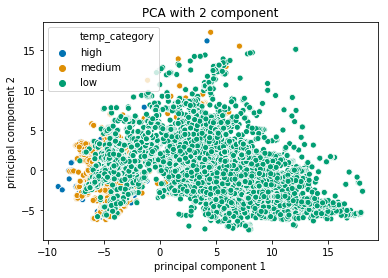

In [46]:
# plot the PCA
g = sns.scatterplot(x="principal component 1", y="principal component 2",
              hue="temp_category",palette='colorblind', 
              data=LSTDf)
g.set_title('PCA with 2 component')

In [52]:
# Reconstruction error: mean squared distance between the original data and the reconstructed data
X_recovered=pca.inverse_transform(principalComponents)
mean_squared_error(X_pca, X_recovered)

0.5058599295655499

#### * Refit models with PCA tranformed data:

#### 1. Low temp group:

In [92]:
## fit group data 
X_train, X_test, Y_train, Y_test = \
train_test_split(X_low, Y_low, test_size=0.3)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train= pca.transform(X_train)
X_test = pca.transform(X_test)

# linear regression
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train)
preds = lr.predict(X_test)
mse_ls_ols=mean_squared_error(Y_test, preds)

# ridge regression
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,Y_train)
preds = reg.predict(X_test)
mse_ls_rid=mean_squared_error(Y_test, preds)

# bayseian regression
bay = linear_model.BayesianRidge()
bay.fit(X_train,Y_train)
preds = bay.predict(X_test)
mse_ls_bay=mean_squared_error(Y_test, preds)

print(mse_ls_ols)
print(mse_ls_rid)
print(mse_ls_bay)

36.33044688193627
36.33044688193726
36.330513736578794


#### 2. Medium temp group:

In [93]:
## fit group data 
X_train, X_test, Y_train, Y_test = \
train_test_split(X_med, Y_med, test_size=0.3)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train= pca.transform(X_train)
X_test = pca.transform(X_test)

# linear regression
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train)
preds = lr.predict(X_test)
mse_ls_ols=mean_squared_error(Y_test, preds)

# ridge regression
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,Y_train)
preds = reg.predict(X_test)
mse_ls_rid=mean_squared_error(Y_test, preds)

# bayseian regression
bay = linear_model.BayesianRidge()
bay.fit(X_train,Y_train)
preds = bay.predict(X_test)
mse_ls_bay=mean_squared_error(Y_test, preds)

print(mse_ls_ols)
print(mse_ls_rid)
print(mse_ls_bay)

502.33640666152934
502.3364066616013
502.35854974110964


#### 3. High temp group:

In [95]:
## fit group data 
X_train, X_test, Y_train, Y_test = \
train_test_split(X_high, Y_high, test_size=0.3)

pca = PCA(n_components=2)
pca.fit(X_train)

X_train= pca.transform(X_train)
X_test = pca.transform(X_test)

# linear regression
lr=LinearRegression(fit_intercept=True)
lr.fit(X_train,Y_train)
preds = lr.predict(X_test)
mse_ls_ols=mean_squared_error(Y_test, preds)

# ridge regression
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,Y_train)
preds = reg.predict(X_test)
mse_ls_rid=mean_squared_error(Y_test, preds)

# bayseian regression
bay = linear_model.BayesianRidge()
bay.fit(X_train,Y_train)
preds = bay.predict(X_test)
mse_ls_bay=mean_squared_error(Y_test, preds)

print(mse_ls_ols)
print(mse_ls_rid)
print(mse_ls_bay)

78.22160183501472
78.22160183569379
78.2783575190982


#### *regression summary

In [155]:
# refit the linear regression model
lr=LinearRegression(fit_intercept=True)
X=df_feat.iloc[:,0:81]
Y=temp_label.astype("float")
lr.fit(X,Y)

# find the 10 most important beta values in the model
coef=list(lr.coef_)
coef= [abs(x) for x in coef]
rank_coef=pd.DataFrame(coef, columns=['coeff'])
rank_coef=rank_coef.sort_values(by=['coeff'], ascending=False)
rank_coef=rank_coef.reset_index()
rank_coef[0:10]

,index,coeff
0,15,118.698809
1,25,79.316279
2,75,74.410146
3,76,70.369471
4,26,44.824225
5,16,44.143936
6,5,35.960594
7,74,28.397135
8,56,25.439655
9,80,25.024617


### V. K-Nearest neighbors classifier


In [167]:
# define a function: calcuate average MSE score based on 30 random testing:
def KNN_mse(X, Y, k):
    mse_ls=np.empty(30)
    
    for i in range(30):
        X_train, X_test, Y_train, Y_test = \
        train_test_split(X, Y, test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train,Y_train)
        preds = knn.predict(X_test)
        preds=preds.astype(float)
        Y_test=Y_test.astype(float)
        mse_ls[i]=mean_squared_error(Y_test, preds)
    
    mse_score=np.mean(mse_ls)
    
    return mse_score

In [ ]:
# KNN data preparation
Y=Y.astype(str)
Y_low=Y_low.astype(str)
Y_med=Y_med.astype(str)
Y_high=Y_high.astype(str)

#### 1.k=1

In [168]:
print(KNN_mse(X,Y,1))
print(KNN_mse(X_low,Y_low,1))
print(KNN_mse(X_med,Y_med,1))
print(KNN_mse(X_high,Y_high,1))

158.50964175574134
16.841576614122435
204.6548284089248
76.30963926767677


#### 2.k=2

In [169]:
print(KNN_mse(X,Y,2))
print(KNN_mse(X_low,Y_low,2))
print(KNN_mse(X_med,Y_med,2))
print(KNN_mse(X_high,Y_high,2))

195.14488647578486
18.650424216464913
240.27667572982853
79.50357923520924


#### 3.k=5

In [170]:
print(KNN_mse(X,Y,5))
print(KNN_mse(X_low,Y_low,5))
print(KNN_mse(X_med,Y_med,5))
print(KNN_mse(X_high,Y_high,5))

319.86309125202996
25.11761188082549
412.56028901797475
122.41125642857143


#### 4.k=10

In [166]:
print(KNN_mse(X,Y,10))
print(KNN_mse(X_low,Y_low,10))
print(KNN_mse(X_med,Y_med,10))
print(KNN_mse(X_high,Y_high,10))

424.0413078334177
31.29001477936724
540.5724503587934
124.86436585497835
